In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

# Brilho com np.Power()

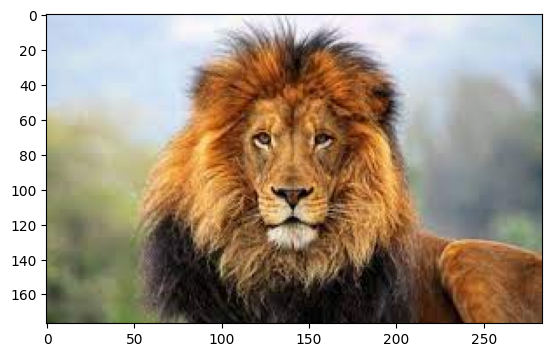

In [4]:
img = cv.imread('storage/leao.jpg').astype(np.float32) / 255
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img)

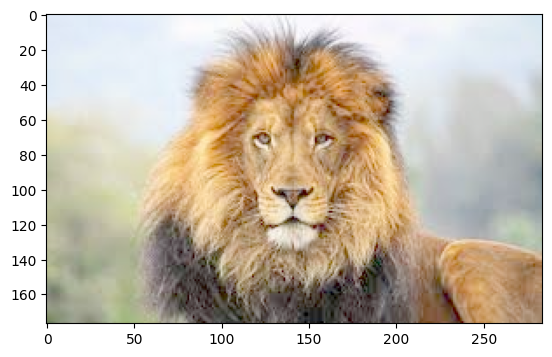

In [18]:
gamma = 1/2
result = np.power(img,gamma)
plt.imshow(result)

# Brurring (embaçamento)

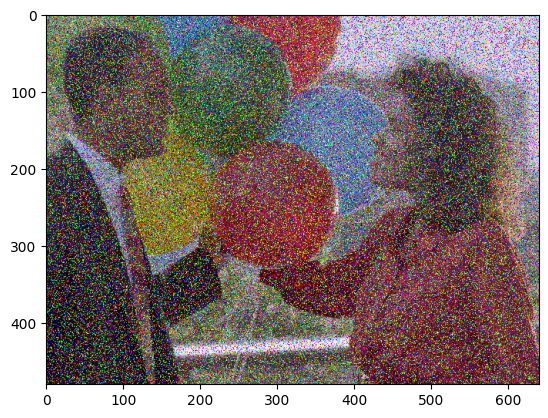

In [21]:
img = cv.imread('storage/noisy.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

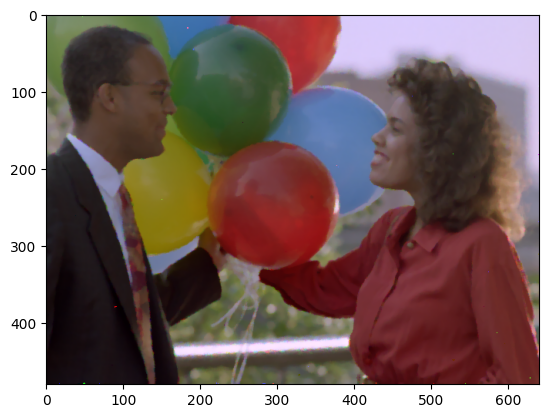

In [26]:
result = cv.medianBlur(img,5)
plt.imshow(result)

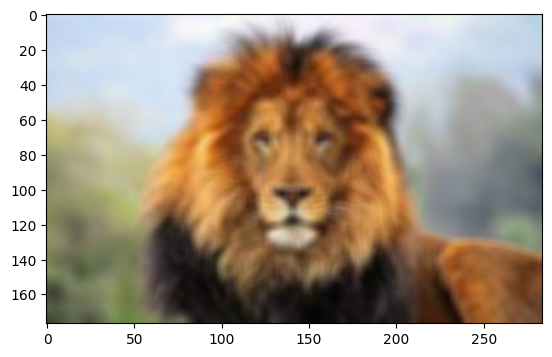

In [28]:
#GausseanBlur
img = cv.imread('storage/leao.jpg').astype(np.float32) / 255
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
gauss_img = cv.GaussianBlur(img, (5,5),10)
plt.imshow(gauss_img)

In [32]:
cv.getGaussianKernel(5,10)

array([[0.19800304],
       [0.20099547],
       [0.20200297],
       [0.20099547],
       [0.19800304]])

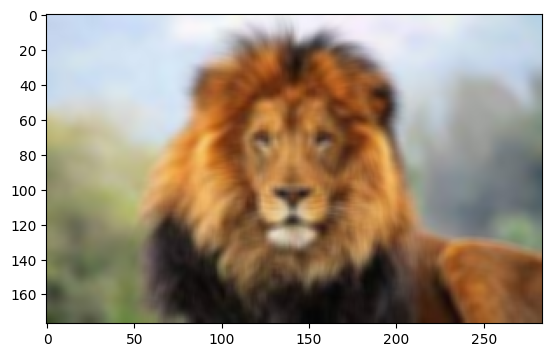

In [34]:
blured = cv.blur(img, ksize=(5,5))
plt.imshow(blured)

In [44]:
#Na Mao
kernel = np.ones(shape=(7,7), dtype=np.float32)/49
kernel

array([[0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816]], dtype=float32)

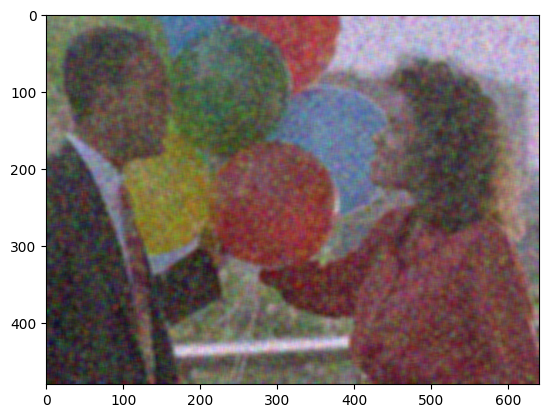

In [45]:
img = cv.imread('storage/noisy.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

result = cv.filter2D(img, -1, kernel)

plt.imshow(result)

# Aumentar a nitidez (Sharpening)

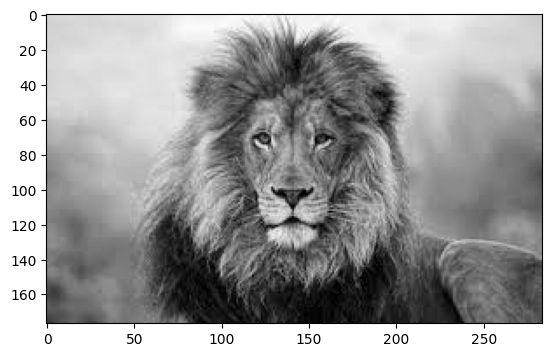

In [48]:
img = cv.imread('storage/leao.jpg',0)
plt.imshow(img, cmap='gray')

(Text(0.5, 1.0, 'Imagem Mais Nitida'), ([], []), ([], []))

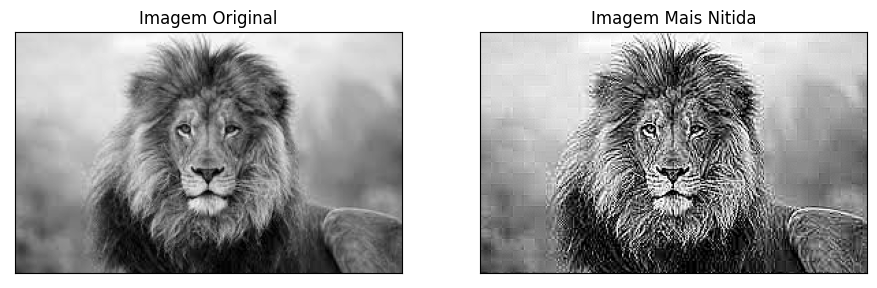

In [47]:
k = np.array([[0, -1, 0],
             [-1,5,-1],
             [0,-1,0]])

sharp_img = cv.filter2D(src=img, ddepth=-1, kernel=k)

plt.figure(figsize=(11,9))
plt.subplot(121), plt.imshow(img,cmap='gray')
plt.title('Imagem Original'), plt.xticks([]),plt.yticks([])
plt.subplot(122), plt.imshow(sharp_img,cmap='gray')
plt.title('Imagem Mais Nitida'), plt.xticks([]),plt.yticks([])

(Text(0.5, 1.0, 'Arestas da imagem do Leao'), ([], []), ([], []))

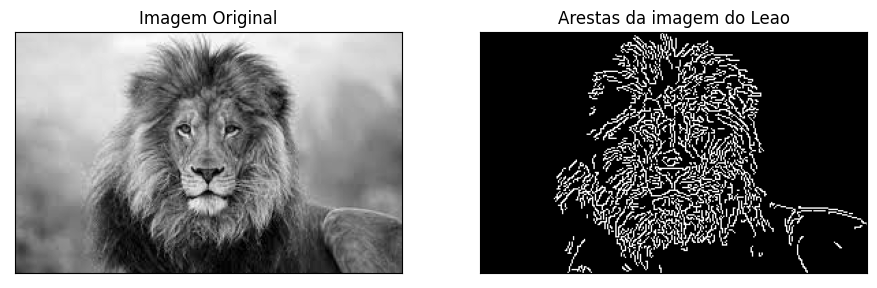

In [50]:
# CANNY DETECÇÂO DE ARESTAS (EDGE DETECTION)
edges = cv.Canny(img,100,250)

plt.figure(figsize=(11,9))
plt.subplot(121), plt.imshow(img,cmap='gray')
plt.title('Imagem Original'), plt.xticks([]),plt.yticks([])
plt.subplot(122), plt.imshow(edges,cmap='gray')
plt.title('Arestas da imagem do Leao'), plt.xticks([]),plt.yticks([])

(Text(0.5, 1.0, 'Arestas da imagem do Leao'), ([], []), ([], []))

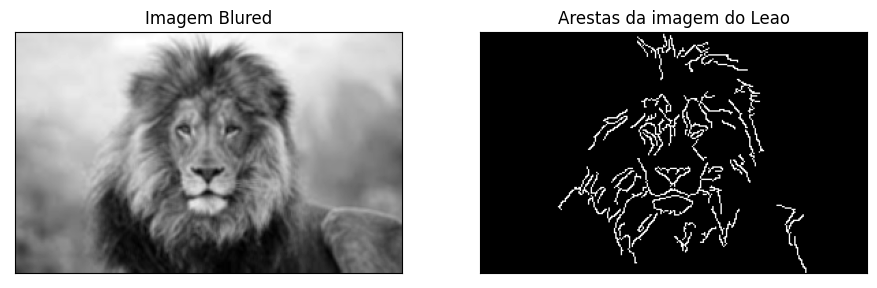

In [52]:
# CANNY DETECÇÂO DE ARESTAS (EDGE DETECTION)

gauss_img = cv.GaussianBlur(img, (3,3),10)

edges = cv.Canny(gauss_img,100,250)

plt.figure(figsize=(11,9))
plt.subplot(121), plt.imshow(gauss_img,cmap='gray')
plt.title('Imagem Blured'), plt.xticks([]),plt.yticks([])
plt.subplot(122), plt.imshow(edges,cmap='gray')
plt.title('Arestas da imagem do Leao'), plt.xticks([]),plt.yticks([])

(Text(0.5, 1.0, 'Arestas da imagem do Leao - Eixo XY'), ([], []), ([], []))

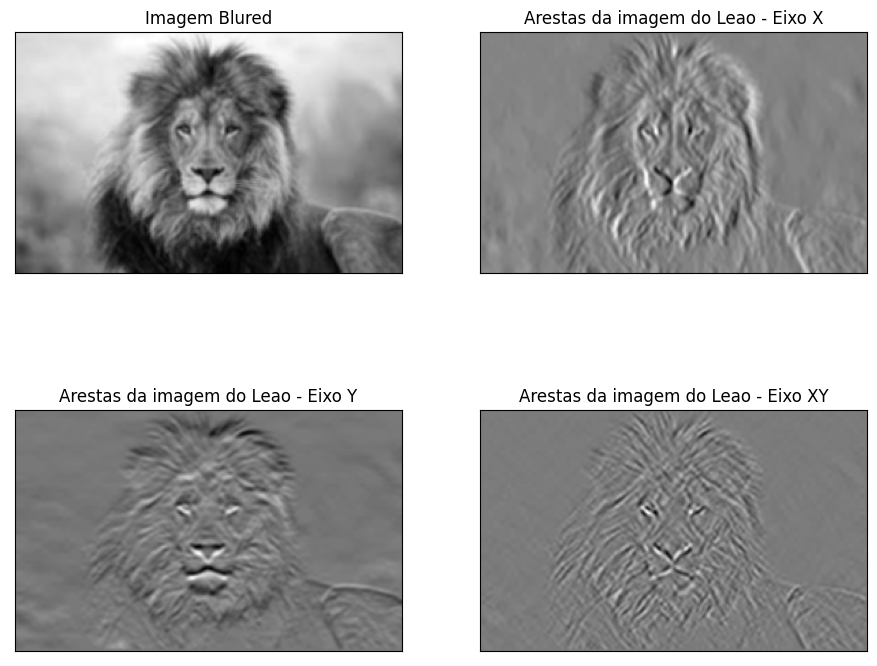

In [53]:
sobelx = cv.Sobel(src=gauss_img, ddepth=cv.CV_64F,dx=1, dy=0, ksize=5)
sobely = cv.Sobel(src=gauss_img, ddepth=cv.CV_64F,dx=0, dy=1, ksize=5)
sobelxy = cv.Sobel(src=gauss_img, ddepth=cv.CV_64F,dx=1, dy=1, ksize=5)

plt.figure(figsize=(11,9))

plt.subplot(221), plt.imshow(gauss_img,cmap='gray')
plt.title('Imagem Blured'), plt.xticks([]),plt.yticks([])

plt.subplot(222), plt.imshow(sobelx,cmap='gray')
plt.title('Arestas da imagem do Leao - Eixo X'), plt.xticks([]),plt.yticks([])

plt.subplot(223), plt.imshow(sobely,cmap='gray')
plt.title('Arestas da imagem do Leao - Eixo Y'), plt.xticks([]),plt.yticks([])

plt.subplot(224), plt.imshow(sobelxy,cmap='gray')
plt.title('Arestas da imagem do Leao - Eixo XY'), plt.xticks([]),plt.yticks([])

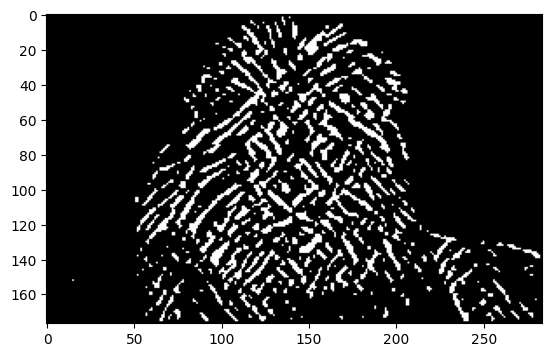

In [54]:
ret = (sobelxy > 100)
plt.imshow(ret,cmap = 'gray')

In [55]:
#HISTOGRAMA

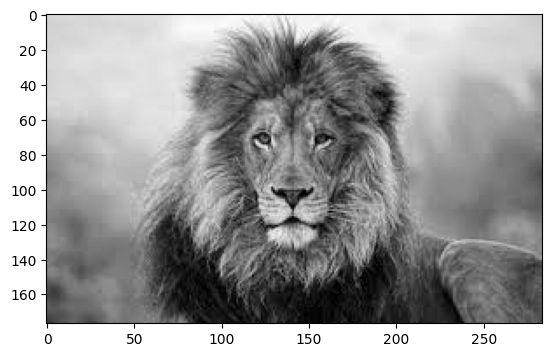

In [56]:
img = cv.imread('storage/leao.jpg',0)
plt.imshow(img, cmap='gray')

In [57]:
hist = cv.calcHist([img], channels=[0], mask=None, histSize=[256], ranges = [0,256])
hist

array([[100.],
       [ 21.],
       [ 28.],
       [ 44.],
       [ 67.],
       [ 74.],
       [ 64.],
       [ 73.],
       [ 72.],
       [ 91.],
       [ 80.],
       [ 95.],
       [107.],
       [106.],
       [ 97.],
       [109.],
       [110.],
       [128.],
       [104.],
       [137.],
       [127.],
       [133.],
       [111.],
       [150.],
       [152.],
       [119.],
       [122.],
       [140.],
       [162.],
       [ 96.],
       [128.],
       [106.],
       [113.],
       [114.],
       [131.],
       [130.],
       [119.],
       [119.],
       [105.],
       [112.],
       [127.],
       [135.],
       [130.],
       [104.],
       [124.],
       [123.],
       [108.],
       [127.],
       [110.],
       [103.],
       [105.],
       [126.],
       [104.],
       [101.],
       [121.],
       [112.],
       [112.],
       [121.],
       [130.],
       [138.],
       [129.],
       [130.],
       [167.],
       [133.],
       [151.],
       [120.],
       [13

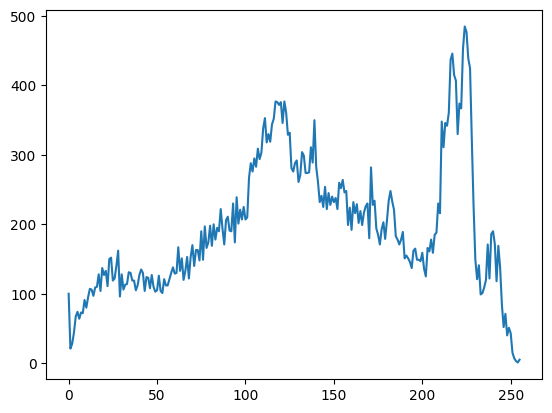

In [58]:
plt.plot(hist)

In [59]:
img = cv.imread('storage/leao.jpg')


In [60]:
color = ('b', 'g', 'r')

Text(0.5, 1.0, 'Histograma do Leao')

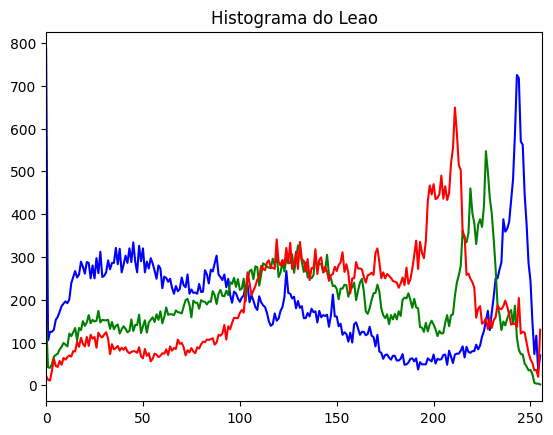

In [62]:
for i, col in enumerate(color):
    hist = cv.calcHist([img], channels=[i], mask=None, histSize=[256], ranges=[0,256])
    plt.plot(hist, color=col)
    plt.xlim([0,256])
    
plt.title('Histograma do Leao')

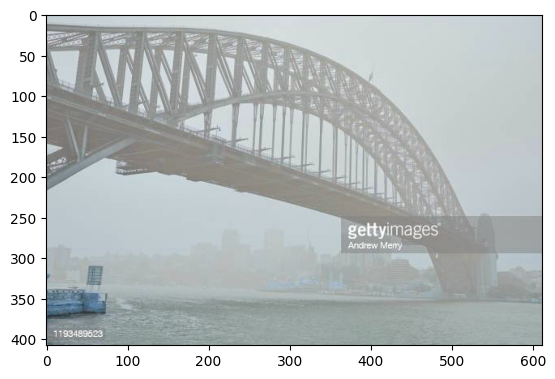

In [63]:
img = cv.imread('storage/low_cont_bridge.jpg')
plt.imshow(img)

Text(0.5, 1.0, 'Histograma da Ponte')

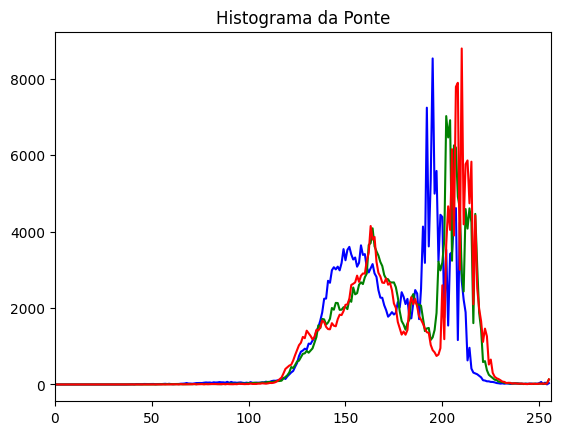

In [64]:
for i, col in enumerate(color):
    hist = cv.calcHist([img], channels=[i], mask=None, histSize=[256], ranges=[0,256])
    plt.plot(hist, color=col)
    plt.xlim([0,256])
    
plt.title('Histograma da Ponte')

In [65]:
#HSV = HUE< SATURATION, e VALOR

hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
hsv[:,:,2]

array([[212, 212, 212, ..., 207, 207, 207],
       [212, 212, 212, ..., 207, 207, 207],
       [212, 212, 212, ..., 207, 207, 207],
       ...,
       [183, 167, 132, ..., 172, 172, 172],
       [182, 168, 126, ..., 173, 173, 173],
       [199, 189, 145, ..., 174, 174, 174]], dtype=uint8)

In [67]:
hsv[:,:,2] = cv.equalizeHist(hsv[:,:,2])

In [68]:
eq_color_img = cv.cvtColor(hsv, cv.COLOR_HSV2RGB)

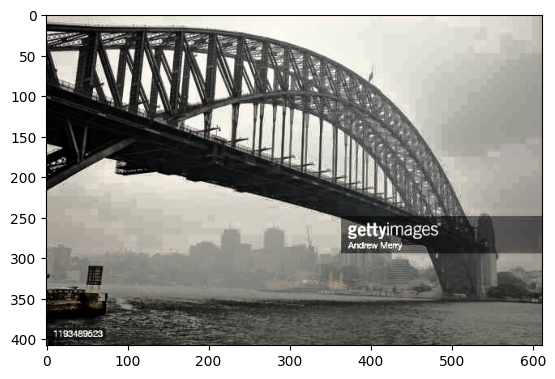

In [69]:
plt.imshow(eq_color_img)

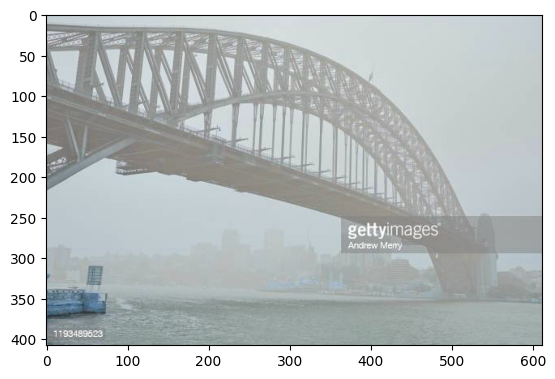

In [70]:
plt.imshow(img)

Text(0.5, 1.0, 'Histograma da Ponte EQUALIZADA')

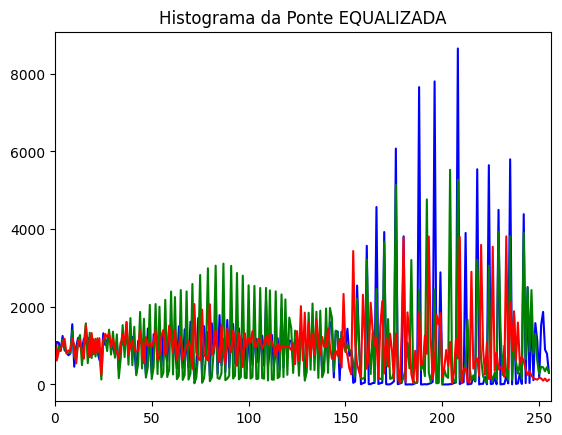

In [71]:
for i, col in enumerate(color):
    hist = cv.calcHist([eq_color_img], channels=[i], mask=None, histSize=[256], ranges=[0,256])
    plt.plot(hist, color=col)
    plt.xlim([0,256])
    
plt.title('Histograma da Ponte EQUALIZADA')

# EXERCICIOS
1) Escolha uma imagem e gere 10 imagens seguidas, aumentando seu brilho gradualmente
2) Escolha uma imagem com ruido e aplique 4 tipos de Blur (Embaçamento). Mostre as 4 imagens no mesmo subplot
3) Escolha uma imagem e aumente sua nitidez (Sharpening)
4) Escolha uma imagem e encontre suas "arestas". Teste os parametros das funções até encontrar um bom resultado
5) Escolha uma imagem colorida e calcule o histograma para cada canal de cor (As 3 linhas devem estar no mesmo plot)
6) Equalize a imagem anterior e mostre o resultado.